# Stock price prediction using Long-Short Term Memory

## Problem Statement 
The main aim of the project is to predict close price of next 20 days

## Import library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\dell\Downloads\ICICIBANK.NS(2).csv")

In [3]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2007-10-29  220.018188  231.272720  217.363632  225.572723  184.000305   
1  2007-10-30  227.500000  235.263641  218.663635  225.490906  183.933609   
2  2007-10-31  225.636368  231.090912  220.654541  228.009094  185.987656   
3  2007-11-01  230.909088  239.636368  225.454544  236.054550  192.550400   
4  2007-11-02  225.927277  245.272720  224.727264  242.436356  197.756027   

       Volume  
0  27834911.0  
1  27964673.0  
2  11675427.0  
3  27922845.0  
4  10804777.0

In [4]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
3945  2023-10-19  936.000000  945.000000  934.000000  935.750000  935.750000   
3946  2023-10-20  932.000000  940.000000  930.000000  932.750000  932.750000   
3947  2023-10-23  942.000000  944.799988  925.400024  929.950012  929.950012   
3948  2023-10-25  926.049988  933.799988  911.400024  916.099976  916.099976   
3949  2023-10-26  914.299988  916.599976  899.000000  908.650024  908.650024   

          Volume  
3945   8612676.0  
3946   6586576.0  
3947  11856890.0  
3948  12593434.0  
3949  21693345.0

## Check data to perform

In [5]:
df=df.dropna()

In [6]:
df.shape

(3943, 7)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 0 to 3949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3943 non-null   object 
 1   Open       3943 non-null   float64
 2   High       3943 non-null   float64
 3   Low        3943 non-null   float64
 4   Close      3943 non-null   float64
 5   Adj Close  3943 non-null   float64
 6   Volume     3943 non-null   float64
dtypes: float64(6), object(1)
memory usage: 246.4+ KB


In [9]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  3943.000000  3943.000000  3943.000000  3943.000000  3943.000000   
mean    338.973436   343.174931   334.393065   338.789758   323.359816   
std     233.160139   234.756053   231.478391   233.198516   237.868090   
min      47.945454    49.527271    45.872726    47.809093    39.700455   
25%     182.399994   185.422722   179.663635   182.150002   158.941170   
50%     254.818176   258.090912   251.000000   254.136368   240.323715   
75%     391.225006   396.625000   387.024994   392.000000   384.612030   
max    1004.950012  1008.700012   990.450012   998.299988   992.450012   

             Volume  
count  3.943000e+03  
mean   2.337523e+07  
std    1.942975e+07  
min    0.000000e+00  
25%    1.263095e+07  
50%    1.793725e+07  
75%    2.686832e+07  
max    2.868577e+08

In [10]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2007-10-29
Ending Date 2023-10-26


In [11]:
x=df.Open
y=df.Close
a=df.High
b=df.Low

In [12]:
import plotly.express as px
from itertools import cycle


names= cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])


fig = px.line(df, x='Date', y=["Open",'Close',"High","Low"], labels={'Date': 'Date','value':'Stock value'},
              title='IDEA.NS stock prices chart')

fig.update_layout( font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))



fig.show()

C:\Users\Armaan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Original closing price

In [13]:
import plotly.express as px
from itertools import cycle
name=cycle(["Close price"])
fig=px.line(df,x="Date",y=["Close"])
fig.update_layout( font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(name)))
fig.show()

## Data visualisation of the data

In [14]:
import seaborn as sns
from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt

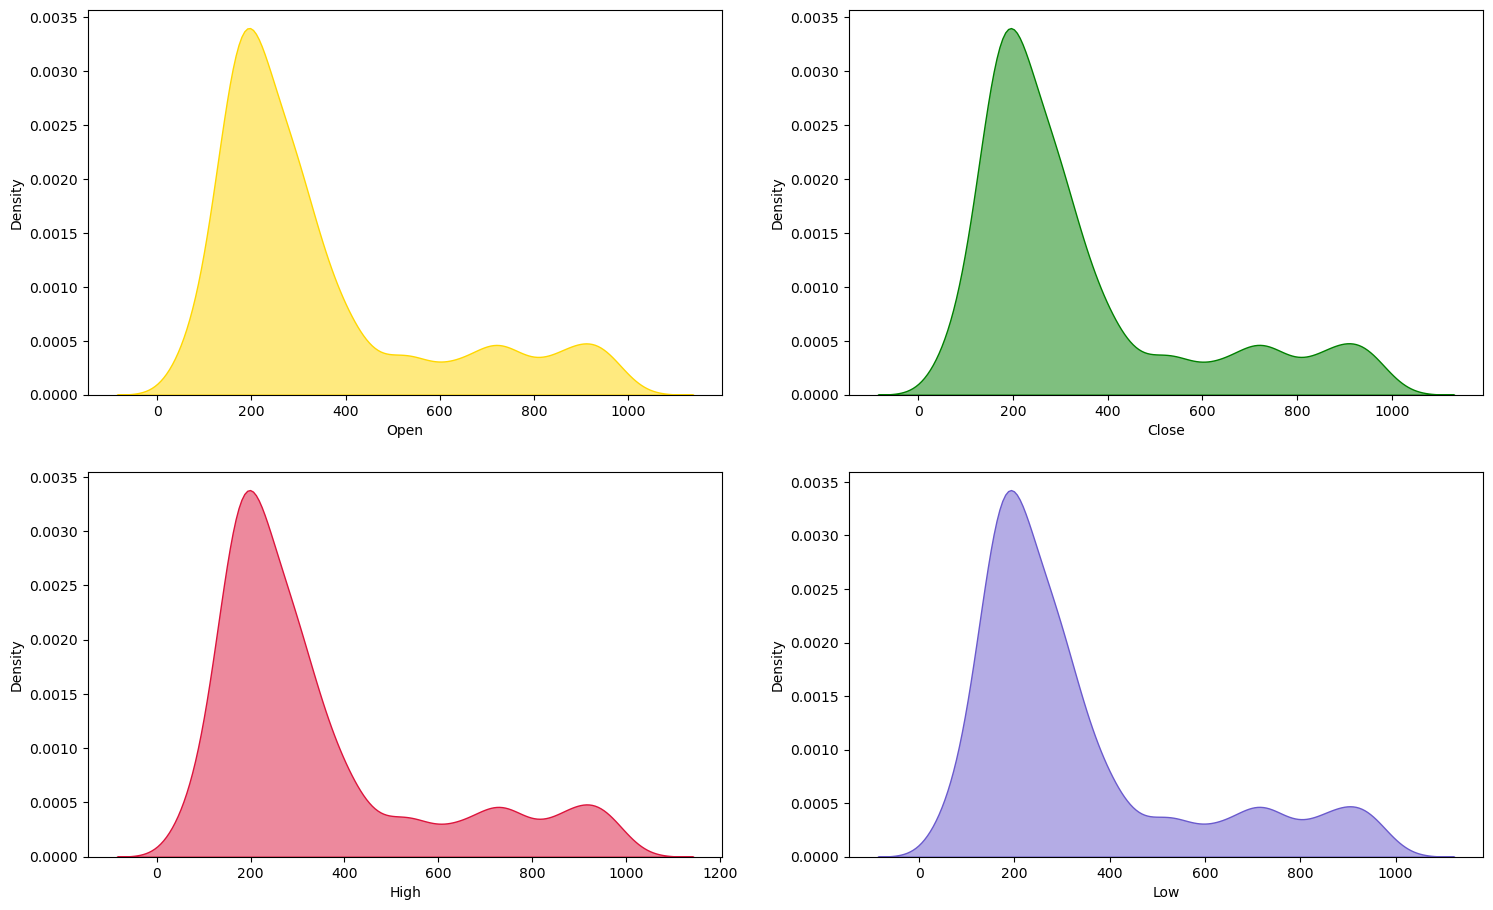

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(18, 11))
sns.kdeplot(  df['Open'],shade=True,label='Open',color='gold',ax=axs[0, 0],alpha=0.5)
sns.kdeplot(df['Close'],shade=True,label='Close',color='green',ax=axs[0, 1],alpha=0.5)
sns.kdeplot(df['High'],shade=True,label='High',color='crimson',ax=axs[1, 0],alpha=0.5)
sns.kdeplot(df['Low'],shade=True,label='Low',color='slateblue',ax=axs[1, 1],alpha=0.5)
plt.show()

## Check smoothness of data

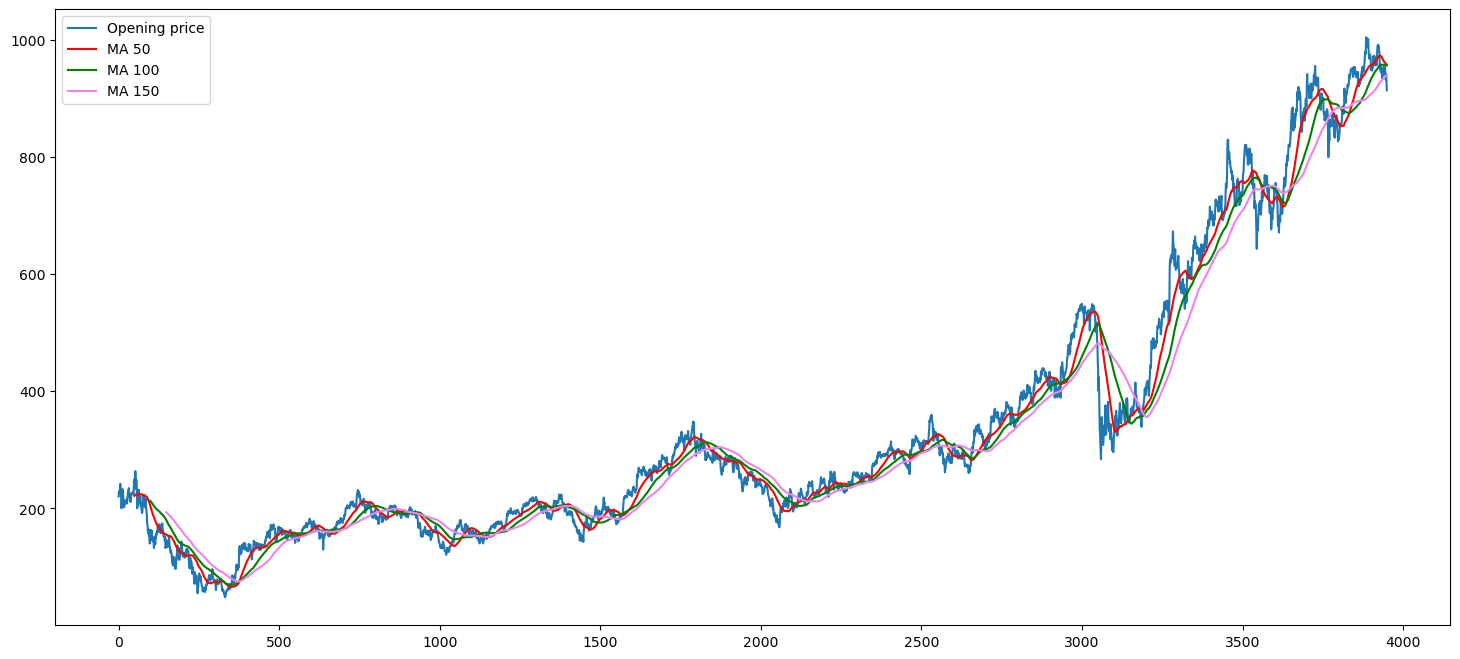

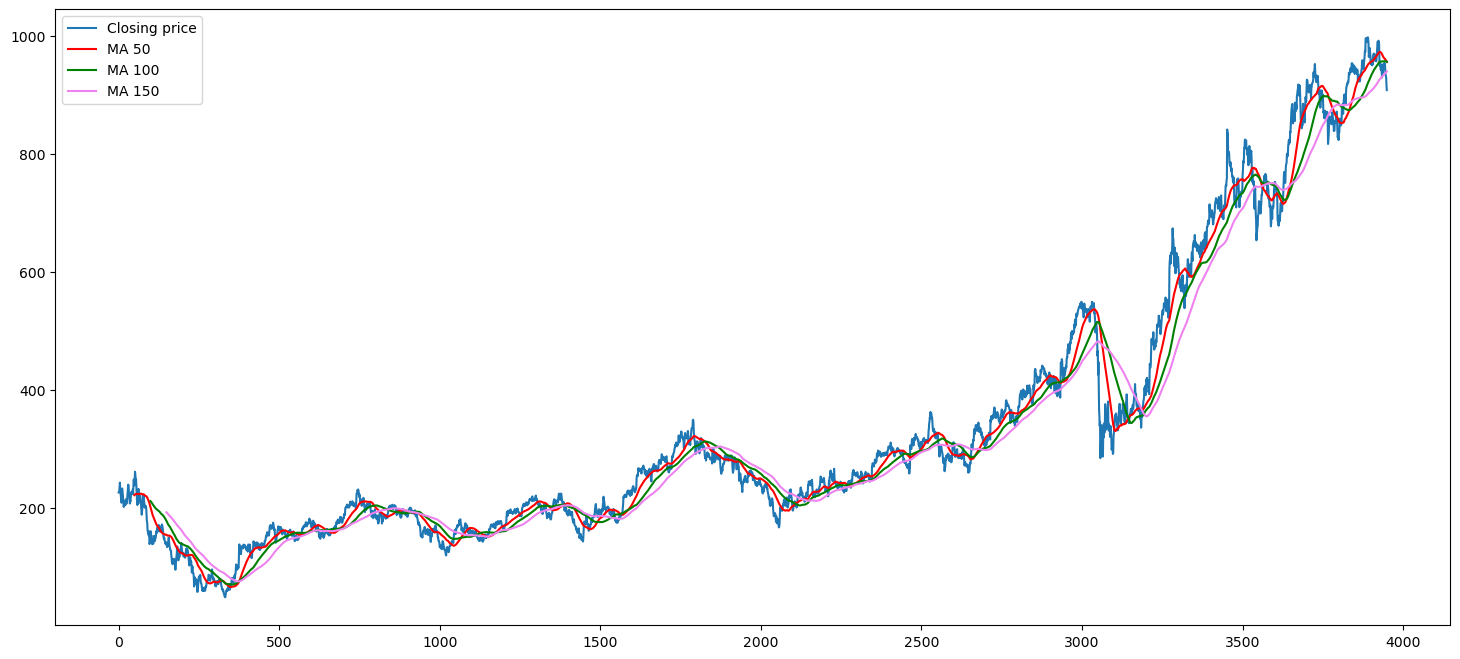

In [16]:
plt.figure(figsize=(18,8))

plt.plot(x, label="Opening price")
ma50=x.rolling(50).mean()
ma100=x.rolling(100).mean()
ma150=x.rolling(150).mean()
plt.plot(ma50, "r", label="MA 50")
plt.plot(ma100, "g", label="MA 100")
plt.plot(ma150, "violet", label="MA 150")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(18,8))
plt.plot(y, label="Closing price")
ma50=y.rolling(50).mean()
ma100=y.rolling(100).mean()
ma150=y.rolling(150).mean()
plt.plot(ma50, "r",label="MA 50")
plt.plot(ma100, "g", label="MA 100")
plt.plot(ma150, "violet",label="MA 150")
plt.legend(loc="best")
plt.show()

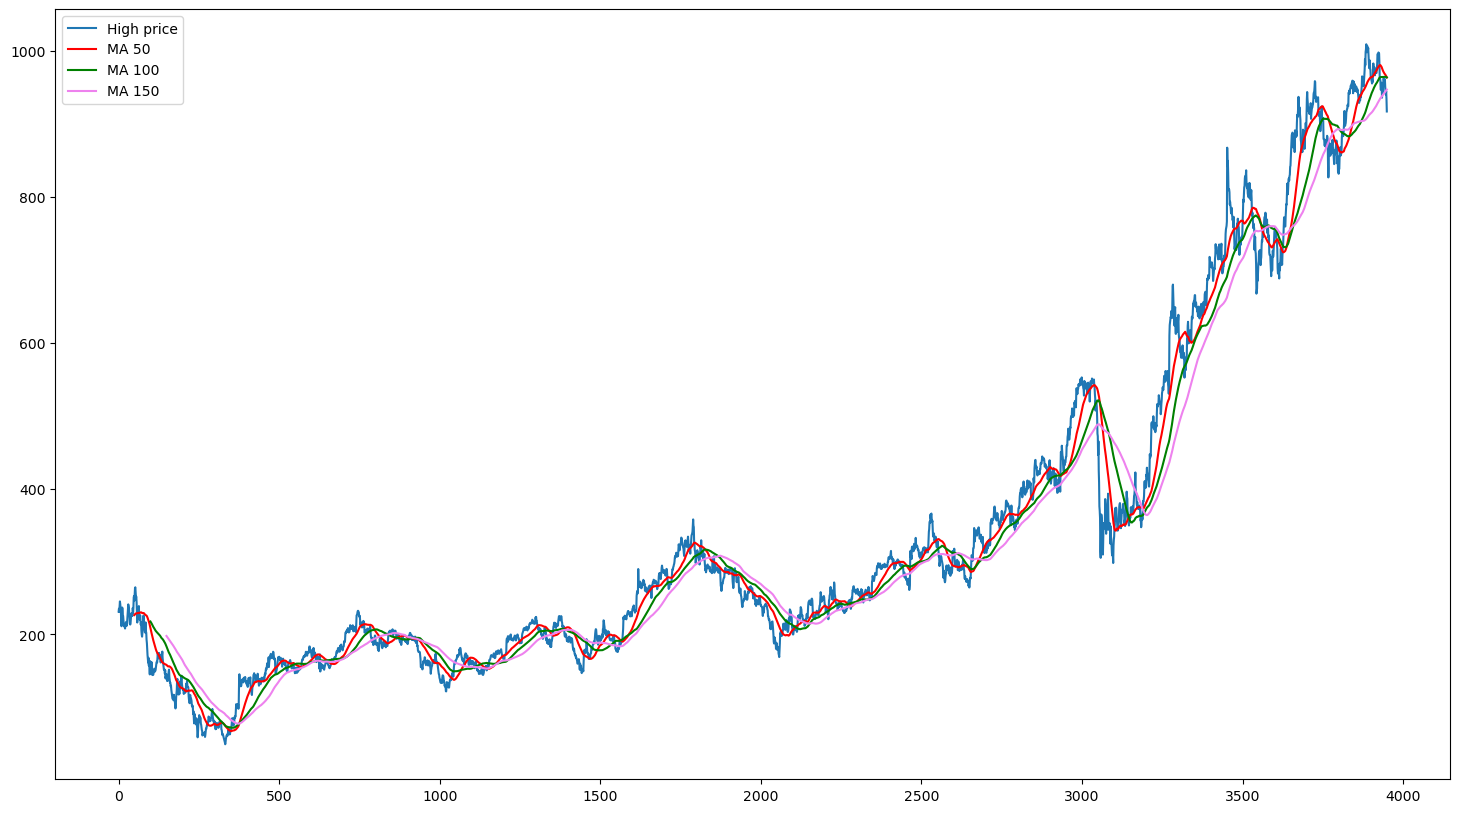

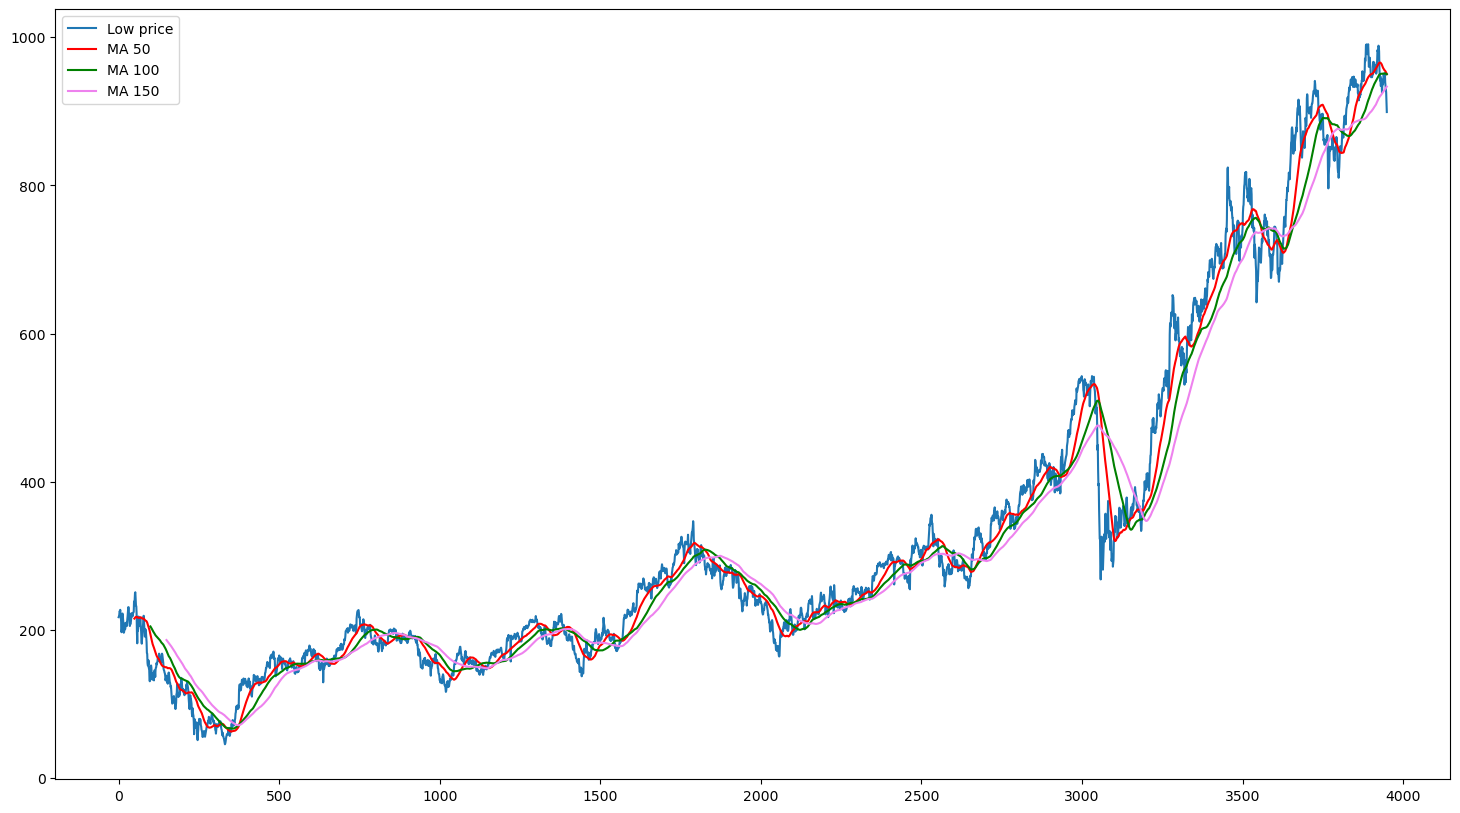

In [17]:
plt.figure(figsize=(18,10))

plt.plot(a, label="High price")
ma50=a.rolling(50).mean()
ma100=a.rolling(100).mean()
ma150=a.rolling(150).mean()
plt.plot(ma50, "r", label="MA 50")
plt.plot(ma100, "g", label="MA 100")
plt.plot(ma150, "violet", label="MA 150")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(18,10))
plt.plot(b, label="Low price")
ma50=b.rolling(50).mean()
ma100=b.rolling(100).mean()
ma150=b.rolling(150).mean()
plt.plot(ma50, "r", label="MA 50")
plt.plot(ma100, "g", label="MA 100")
plt.plot(ma150, "violet", label="MA 150")
plt.legend(loc="best")
plt.show()

### Insights
- A moving average is a statistic that captures the average change in a data series over time.
- I plotted moving averages for 50, 150, and 100 periods alongside the original line plot. However, I chose to use the 50-period moving average for further analysis because it provides a smoother representation.

In [18]:
df1=df.reset_index()['Close']

In [19]:
df1

0       225.572723
1       225.490906
2       228.009094
3       236.054550
4       242.436356
           ...    
3938    935.750000
3939    932.750000
3940    929.950012
3941    916.099976
3942    908.650024
Name: Close, Length: 3943, dtype: float64

## Scaling using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
df1=Scaler.fit_transform(np.array(df1).reshape(-1,1))  #Fit to data, then transform it.

In [21]:
df1

array([[0.18702297],
       [0.18693689],
       [0.18958625],
       ...,
       [0.92808982],
       [0.91351836],
       [0.90568035]])

In [22]:
df1.shape

(3943, 1)

## Split the data into train and test 

In [23]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]
#time_step -> the len of the input sequence

In [24]:
training_size, test_size

(2957, 986)

In [25]:
import numpy
def create_dataset(dataset, time_step=1): 
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
                             
    
                             

In [26]:
time_step=50
X_train, y_train=create_dataset(train_data, time_step)
X_test, ytest=create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(2906, 50)
(2906,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(935, 50)
(935,)


(None, None)

In [29]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2906, 50, 1)
X_test:  (935, 50, 1)


## Model training

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [48]:
tf.__version__

'2.14.0'

In [49]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Insights
- Here we start to build the model.
- Now, we add four layers to the model. First can remember patterns in a sequences of data and set ups to look at time_step 
  number of data points at a time.
- Second layer takes the output of the previous layer as its input and Third layer only returns the final output not the whole
  sequence.
- Fourth layer connect everything together. It takes output from the previous layer and transform it into the final prediction          
- Here adam is used to improve the model and reduce the loss.                             

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
46/46 [==============================] - 15s 157ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 2/50
46/46 [==============================] - 6s 130ms/step - loss: 2.2950e-04 - val_loss: 0.0018
Epoch 3/50
46/46 [==============================] - 6s 135ms/step - loss: 2.0336e-04 - val_loss: 0.0013
Epoch 4/50
46/46 [==============================] - 6s 124ms/step - loss: 1.9159e-04 - val_loss: 0.0012
Epoch 5/50
46/46 [==============================] - 6s 136ms/step - loss: 1.9402e-04 - val_loss: 0.0013
Epoch 6/50
46/46 [==============================] - 6s 135ms/step - loss: 1.8168e-04 - val_loss: 0.0011
Epoch 7/50
46/46 [==============================] - 6s 132ms/step - loss: 1.6864e-04 - val_loss: 0.0010
Epoch 8/50
46/46 [==============================] - 6s 123ms/step - loss: 1.6761e-04 - val_loss: 0.0010
Epoch 9/50
46/46 [==============================] - 6s 132ms/step - loss: 1.6540e-04 - val_loss: 9.0087e-04
Epoch 10/50
46/46 [==============================] - 6s 137ms/s

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 1s 32ms/step


In [62]:
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

In [63]:
import math 

In [64]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

241.77297467567846

In [65]:
import math
math.sqrt(mean_squared_error(ytest, test_predict))

723.0922327730151

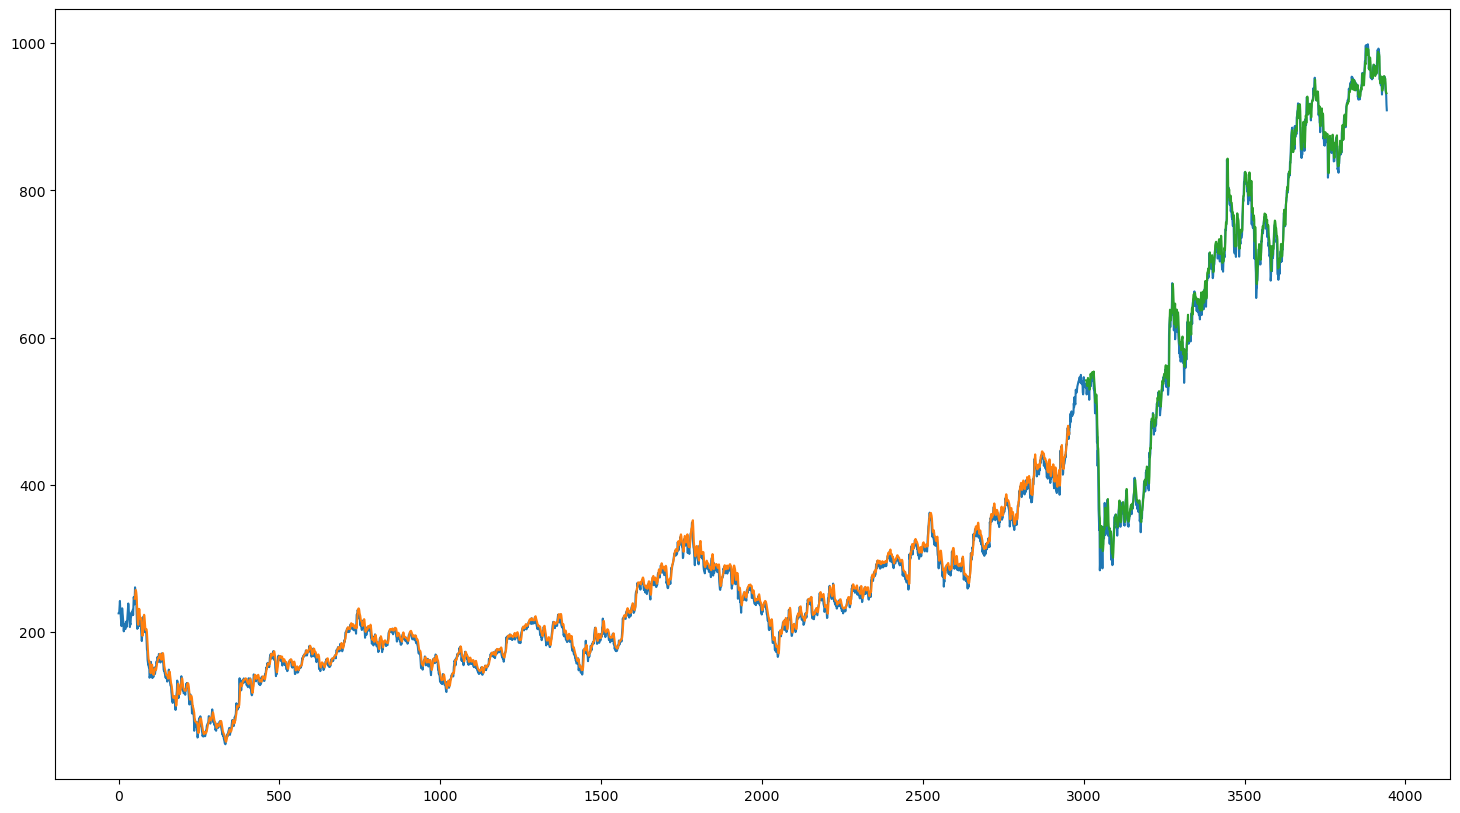

In [66]:
plt.figure(figsize=(18,10))
look_back=50
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict

plt.plot(Scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

986

### Insights
- Blue color shows orinal closing price.
- Here Orange color shows predicted training data and green color shows predicted test data.

In [72]:
x_input=test_data[936:].reshape(1,-1)
x_input.shape

(1, 50)

In [73]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [74]:
temp_input

[0.9592315926392961,
 0.9560227370720894,
 0.9509201358525375,
 0.9498680479206484,
 0.9546550353856887,
 0.9512883413785883,
 0.9669118219170315,
 0.9691212444491643,
 0.9706467845754586,
 0.9708045598900764,
 0.9678587263058421,
 0.9585477733587336,
 0.95838993491884,
 0.968858222466192,
 0.967437865882976,
 0.9685426087116805,
 0.9570748250039786,
 0.9656493668989853,
 0.9708045598900764,
 0.9789056495906779,
 0.9917937267563198,
 0.9910572525789422,
 0.9888478931720855,
 0.9938453108485589,
 0.9914781130018083,
 0.9882692574346016,
 0.9589685706563237,
 0.9494997792693216,
 0.9558648986321957,
 0.9478164638284093,
 0.9419247335346647,
 0.9413986895687201,
 0.9511831578355098,
 0.9389788999504303,
 0.9281949986485667,
 0.9395575356879141,
 0.9441341560667974,
 0.9371903378411636,
 0.9504466836581321,
 0.952445612853556,
 0.9536555392253389,
 0.9505518672012107,
 0.9506571138695653,
 0.9532873336992881,
 0.9426086159405029,
 0.9341919124853899,
 0.9310356486897226,
 0.928089815105488

In [75]:
from numpy import array

list_output=[]
n_step=50
i=0
while(i<20):
    
    if(len(temp_input)>50):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_step,1))
        
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_step,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
        
        
print(list_output)
    

[0.9103341]
51
1 day input [0.95602274 0.95092014 0.94986805 0.95465504 0.95128834 0.96691182
 0.96912124 0.97064678 0.97080456 0.96785873 0.95854777 0.95838993
 0.96885822 0.96743787 0.96854261 0.95707483 0.96564937 0.97080456
 0.97890565 0.99179373 0.99105725 0.98884789 0.99384531 0.99147811
 0.98826926 0.95896857 0.94949978 0.9558649  0.94781646 0.94192473
 0.94139869 0.95118316 0.9389789  0.928195   0.93955754 0.94413416
 0.93719034 0.95044668 0.95244561 0.95365554 0.95055187 0.95065711
 0.95328733 0.94260862 0.93419191 0.93103565 0.92808982 0.91351836
 0.90568035 0.91033411]
1 day input [[0.9136142]]
2 day input [0.95092014 0.94986805 0.95465504 0.95128834 0.96691182 0.96912124
 0.97064678 0.97080456 0.96785873 0.95854777 0.95838993 0.96885822
 0.96743787 0.96854261 0.95707483 0.96564937 0.97080456 0.97890565
 0.99179373 0.99105725 0.98884789 0.99384531 0.99147811 0.98826926
 0.95896857 0.94949978 0.9558649  0.94781646 0.94192473 0.94139869
 0.95118316 0.9389789  0.928195   0.9395

15 day input [[0.93368775]]
16 day input [0.95707483 0.96564937 0.97080456 0.97890565 0.99179373 0.99105725
 0.98884789 0.99384531 0.99147811 0.98826926 0.95896857 0.94949978
 0.9558649  0.94781646 0.94192473 0.94139869 0.95118316 0.9389789
 0.928195   0.93955754 0.94413416 0.93719034 0.95044668 0.95244561
 0.95365554 0.95055187 0.95065711 0.95328733 0.94260862 0.93419191
 0.93103565 0.92808982 0.91351836 0.90568035 0.91033411 0.91361421
 0.92007852 0.92624009 0.93162614 0.93573272 0.93819141 0.93902886
 0.93856746 0.93728375 0.93568701 0.93422258 0.93320537 0.93279195
 0.93298918 0.93368775]
16 day input [[0.9347076]]
17 day input [0.96564937 0.97080456 0.97890565 0.99179373 0.99105725 0.98884789
 0.99384531 0.99147811 0.98826926 0.95896857 0.94949978 0.9558649
 0.94781646 0.94192473 0.94139869 0.95118316 0.9389789  0.928195
 0.93955754 0.94413416 0.93719034 0.95044668 0.95244561 0.95365554
 0.95055187 0.95065711 0.95328733 0.94260862 0.93419191 0.93103565
 0.92808982 0.91351836 0.905

In [76]:
len(df1)

3943

## Prediction

In [77]:
day_new=np.arange(1,51)
day_pred=np.arange(51,71)

In [78]:
df3=df1.tolist()
df3.extend(list_output)

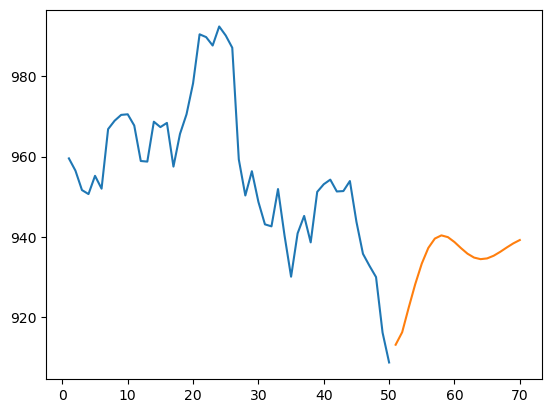

In [79]:
plt.plot(day_new, Scaler.inverse_transform(df1[3893:]))
plt.plot(day_pred, Scaler.inverse_transform(list_output))

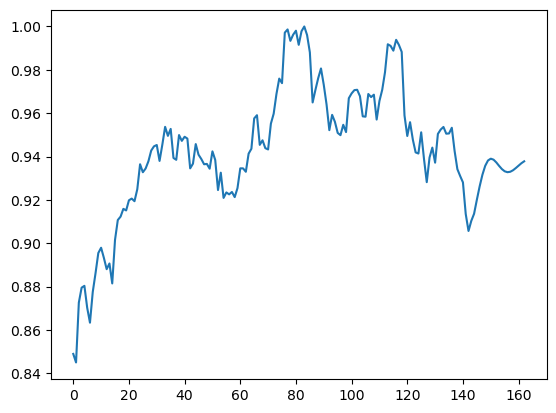

In [80]:
df3=df1.tolist()
df3.extend(list_output)
plt.plot(df3[3800:])

In [81]:
df3=Scaler.inverse_transform(df3).tolist()

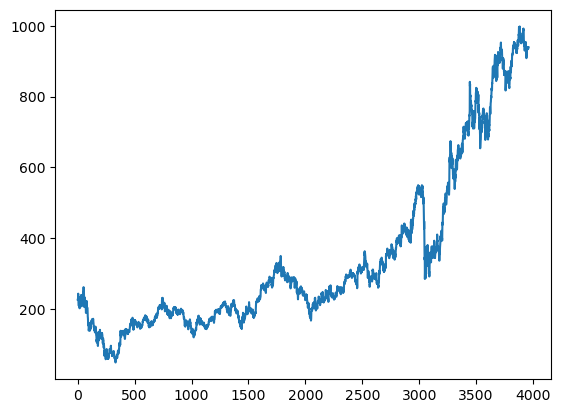

In [82]:
plt.plot(df3)

In [83]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 20
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  20


In [84]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [85]:
import plotly.express as px
from itertools import cycle

In [86]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = Scaler.inverse_transform(df1[len(df1)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = Scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 50 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 50 days vs next 20 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [87]:
lstmgrudf=df1.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=Scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

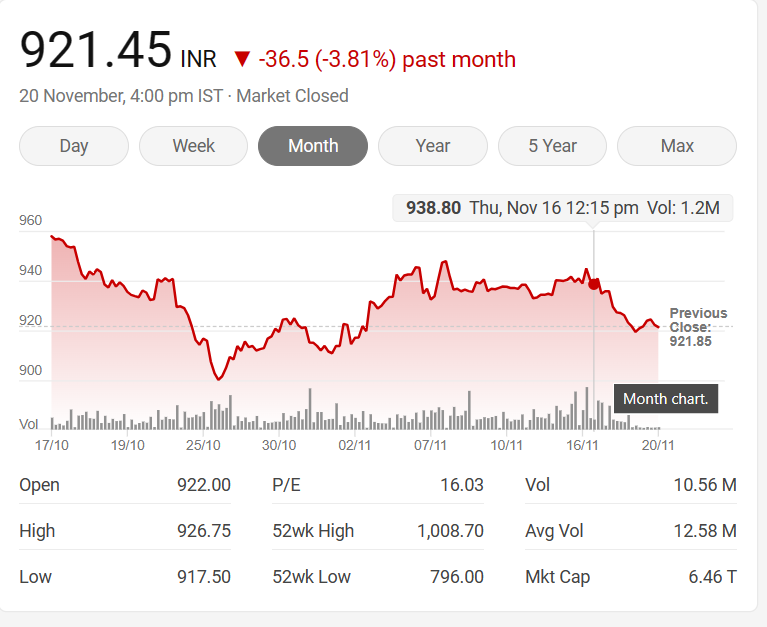

### Insights
- 